In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from rdkit.Chem import PandasTools

In [2]:
FILE_LOCATION = Path("../data/MalariaData_bioactivity.txt")

In [3]:
df = pd.read_table(FILE_LOCATION)

/var/folders/mr/bl2q5rxs0t3d8d8tn7wdcxz80000gp/T/ipykernel_1126/2337347344.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(FILE_LOCATION)


In [ ]:
help(os)

In [4]:
df.head()

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
0,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
1,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
2,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
3,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
4,111,CHEMBL266459,0,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2,InChI=1S/C15H14ClNO3.Na/c1-9-7-12(8-13(18)19)1...,313.71,3.93,3.36,0.27,59.3,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET


In [5]:
df.shape

(532413, 44)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['MOLREGNO', 'MOL_CHEMBL_ID', 'DOWNGRADED', 'CANONICAL_SMILES',
       'STANDARD_INCHI', 'FULL_MWT', 'ALOGP', 'ACD_LOGP', 'ACD_LOGD', 'PSA',
       'SRC_DESCRIPTION', 'ASSAY_DESCRIPTION', 'ASSAY_CATEGORY',
       'ASSAY_ORGANISM', 'ASSAY_TAX_ID', 'ASSAY_STRAIN', 'ASSAY_CHEMBL_ID',
       'ACTIVITY_ID', 'ASSAY_ID', 'DOC_ID', 'RECORD_ID', 'STANDARD_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'STANDARD_VALUE',
       'STANDARD_UNITS', 'STANDARD_FLAG', 'STANDARD_TYPE', 'ACTIVITY_COMMENT',
       'PUBLISHED_TYPE', 'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE',
       'PUBLISHED_RELATION', 'PCHEMBL_VALUE', 'TARGET_TYPE', 'PREF_NAME',
       'ORGANISM', 'TARGET_CHEMBL_ID', 'JOURNAL', 'YEAR', 'TITLE', 'PUBMED_ID',
       'DOI', 'DOC_TYPE'],
      dtype='object')

In [8]:
df.PCHEMBL_VALUE.notnull().sum()

np.int64(63419)

In [9]:
df["CANONICAL_SMILES"].nunique()

266294

In [10]:
df[df.PCHEMBL_VALUE.notnull()]["CANONICAL_SMILES"].nunique()

35415

In [11]:
len(df)

532413

In [13]:
df.STANDARD_VALUE.notnull().sum(), df.PUBLISHED_VALUE.notnull().sum()

(np.int64(520275), np.int64(520275))

In [15]:
df = df[df.STANDARD_VALUE.notnull()]

In [16]:
df.shape

(520275, 44)

In [17]:
df[['MOLREGNO', 'CANONICAL_SMILES','PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'STANDARD_VALUE',
       'STANDARD_UNITS', 'STANDARD_FLAG', 'STANDARD_TYPE', 'ACTIVITY_COMMENT',
       ]]

,MOLREGNO,CANONICAL_SMILES,PUBLISHED_VALUE,PUBLISHED_UNITS,STANDARD_VALUE,STANDARD_UNITS,STANDARD_FLAG,STANDARD_TYPE,ACTIVITY_COMMENT
0,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,19.9526,um,19952.60,nM,1,Potency,Inconclusive
1,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,11.2202,um,11220.20,nM,1,Potency,Active
2,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,12.5893,um,12589.30,nM,1,Potency,Inconclusive
3,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,10.0000,um,10000.00,nM,1,Potency,Inconclusive
4,111,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2,13.1154,uM,13115.40,nM,1,Potency,inactive
...,...,...,...,...,...,...,...,...,...
532408,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,22.2000,nM,22.20,nM,1,IC50,NaN
532409,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,0.0000,%,0.00,%,1,Inhibition,NaN
532410,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,100.0000,%,100.00,%,1,Inhibition,NaN
532411,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,0.7100,%,0.71,%,1,IFI,NaN


In [18]:
list(df["STANDARD_TYPE"].unique())

['Potency',
 'IC50',
 'FIC50',
 'Inhibition',
 'Activity',
 'EC50',
 'IFI',
 'CC50',
 'XC50',
 'Ratio IC50',
 'MIC',
 'Kd',
 'Selective toxicity',
 'Delta MST',
 'IC50 ratio',
 'Relative activity',
 'Ki',
 'Ratio',
 'Safety ratio',
 'SD90',
 'AC50',
 'ED50',
 'IC90',
 'MST',
 'Ratio Ki',
 'Schizont size',
 'ED90',
 'Fold change',
 'Selectivity index',
 'Survived',
 'Parasitemia',
 'Selectivity ratio',
 'Index',
 'Time',
 'Mean survival days',
 'Resistance index',
 'Survival',
 'MTD',
 'Reversal',
 'IC99',
 'MSD',
 'Ratio CC50/IC50',
 'Ratio ED50',
 'AUC',
 'TI',
 'Mortality',
 'Infected erythrocytes',
 'Survival time',
 'Log K',
 'Toxicity ratio',
 'Suppression',
 'Ratio EC50',
 'Number',
 'Drug uptake',
 'CAR',
 'ID50',
 'CL/F',
 'MCD',
 'CD50',
 'T-C',
 'GI',
 'Ratio LD50/ED50',
 'Accumulation coefficient',
 'Vd/F',
 'Selectivity',
 'LD50',
 't1/2abs',
 'T1/2',
 'VAR',
 'MIC90',
 'Selectivity Index',
 'IC10',
 'ILS',
 'Survival rate',
 'Reduction',
 'Vd',
 'CD90',
 'ED99',
 'Resistan

In [19]:
df.query("STANDARD_TYPE=='Potency'").shape

(314510, 44)

In [25]:
df.query("STANDARD_TYPE=='Potency'")["CANONICAL_SMILES"].nunique()

217449

In [20]:
df.query("STANDARD_TYPE=='EC50'").shape

(21228, 44)

In [21]:
df.query("STANDARD_TYPE=='IC50'").shape

(48010, 44)

In [22]:
df.query("STANDARD_TYPE=='FIC50'").shape

(71, 44)

In [23]:
df.query("STANDARD_TYPE=='Inhibition'").shape

(64592, 44)

In [24]:
df.query("STANDARD_TYPE=='Inhibition'")["CANONICAL_SMILES"].nunique()

20483

In [26]:
len(df.query("STANDARD_UNITS == '%'"))

87716

In [26]:
df.columns

Index(['MOLREGNO', 'MOL_CHEMBL_ID', 'DOWNGRADED', 'CANONICAL_SMILES',
       'STANDARD_INCHI', 'FULL_MWT', 'ALOGP', 'ACD_LOGP', 'ACD_LOGD', 'PSA',
       'SRC_DESCRIPTION', 'ASSAY_DESCRIPTION', 'ASSAY_CATEGORY',
       'ASSAY_ORGANISM', 'ASSAY_TAX_ID', 'ASSAY_STRAIN', 'ASSAY_CHEMBL_ID',
       'ACTIVITY_ID', 'ASSAY_ID', 'DOC_ID', 'RECORD_ID', 'STANDARD_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'STANDARD_VALUE',
       'STANDARD_UNITS', 'STANDARD_FLAG', 'STANDARD_TYPE', 'ACTIVITY_COMMENT',
       'PUBLISHED_TYPE', 'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE',
       'PUBLISHED_RELATION', 'PCHEMBL_VALUE', 'TARGET_TYPE', 'PREF_NAME',
       'ORGANISM', 'TARGET_CHEMBL_ID', 'JOURNAL', 'YEAR', 'TITLE', 'PUBMED_ID',
       'DOI', 'DOC_TYPE'],
      dtype='object')

In [27]:
df.head().T

,0,1,2,3,4
MOLREGNO,23,23,23,23,111
MOL_CHEMBL_ID,CHEMBL6206,CHEMBL6206,CHEMBL6206,CHEMBL6206,CHEMBL266459
DOWNGRADED,0,0,0,0,0
CANONICAL_SMILES,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2
STANDARD_INCHI,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,InChI=1S/C15H14ClNO3.Na/c1-9-7-12(8-13(18)19)1...
FULL_MWT,317.18,317.18,317.18,317.18,313.71
ALOGP,3.52,3.52,3.52,3.52,3.93
ACD_LOGP,4.39,4.39,4.39,4.39,3.36
ACD_LOGD,4.39,4.39,4.39,4.39,0.27
PSA,26.3,26.3,26.3,26.3,59.3


In [29]:
df.ACTIVITY_COMMENT.unique()

array(['Inconclusive', 'Active', 'inactive', nan, 'active',
       'inconclusive', '60.00 pixels', '42.00 pixels', 'Dark, round slow',
       'Degenerate', '163.00 pixels', 'Toxic in 2 of 5 mice',
       'Round, overactive', 'No effect', 'Slow', 'Overactive',
       'Round, dark', '42.33 pixels', '143.00 pixels', 'Not Active',
       'Dead', 'Round, degenerate, slow', '73.17 pixels', '23.33 pixels',
       '64.33 pixels', 'Toxic in 4 of 5 mice', 'Toxic in 1 of 5 mice',
       'Cured 5 of 5 mice', 'Active; toxic in 2 of 5 mice',
       'Active; toxic in 1of 5 mice', '351.83 pixels', 'Not Determined',
       '50.17 pixels', '56.17 pixels', 'Toxic in 3 of 5 mice',
       'Active; toxic in 3 of 5 mice', '48.33 pixels', '84.00 pixels',
       'Round, degenerate', '28.83 pixels', '192.00 pixels',
       '45.83 pixels', '48.17 pixels', '47.83 pixels', '62.67 pixels',
       '56.83 pixels', 'Round', '165.00 pixels', 'Round, slow',
       'Slow, on sides', '41.33 pixels', 'Slow, on sides, dark'

In [31]:
df.query("STANDARD_TYPE=='Potency'")["ACTIVITY_COMMENT"].unique()

array(['Inconclusive', 'Active', 'inactive', 'active', 'inconclusive'],
      dtype=object)

In [32]:
standard_types = list(df.STANDARD_TYPE.unique())

for i in standard_types:
    print(f"STANDARD TYPE: {i}")
    print(df.query(f"STANDARD_TYPE=='{i}'")["ACTIVITY_COMMENT"].unique())
    print("-"* 50)


STANDARD TYPE: Potency
['Inconclusive' 'Active' 'inactive' 'active' 'inconclusive']
--------------------------------------------------
STANDARD TYPE: IC50
[nan 'Active' 'inactive' 'active' 'Not Active']
--------------------------------------------------
STANDARD TYPE: FIC50
[nan]
--------------------------------------------------
STANDARD TYPE: Inhibition
[nan]
--------------------------------------------------
STANDARD TYPE: Activity
[nan]
--------------------------------------------------
STANDARD TYPE: EC50
[nan]
--------------------------------------------------
STANDARD TYPE: IFI
[nan]
--------------------------------------------------
STANDARD TYPE: CC50
[nan]
--------------------------------------------------
STANDARD TYPE: XC50
[nan]
--------------------------------------------------
STANDARD TYPE: Ratio IC50
[nan]
--------------------------------------------------
STANDARD TYPE: MIC
[nan]
--------------------------------------------------
STANDARD TYPE: Kd
[nan]
--------------

In [39]:
df = df[(df["STANDARD_TYPE"] == "Potency") | (df["STANDARD_TYPE"] == "IC50")]

In [53]:
df.CANONICAL_SMILES.nunique()

236278

In [52]:
df["ACTIVITY_COMMENT"].isnull().sum()

np.int64(43926)

In [54]:
df[["CANONICAL_SMILES", "ACTIVITY_COMMENT"]].dropna()["CANONICAL_SMILES"].nunique()

218266

In [70]:
df = df[df.ACTIVITY_COMMENT.notnull()]

In [72]:
units_df = pd.DataFrame(df.groupby("CANONICAL_SMILES")["STANDARD_UNITS"].unique())

In [78]:
df["STANDARD_UNITS"]

0         nM
1         nM
2         nM
3         nM
4         nM
          ..
528260    nM
528261    nM
528266    nM
528552    nM
528553    nM
Name: STANDARD_UNITS, Length: 318594, dtype: object

In [76]:
sum(units_df["STANDARD_UNITS"].apply(lambda x: len(x)) > 1)

0

In [184]:
df.ACTIVITY_COMMENT.apply(lambda x: x.islower()).sum()

np.int64(318594)

In [158]:
df.ACTIVITY_COMMENT.value_counts()

ACTIVITY_COMMENT
inconclusive    158925
inactive        108450
active           43683
Active            5555
Inconclusive      1864
Not Active         117
Name: count, dtype: int64

In [159]:
df["ACTIVITY_COMMENT"] = df["ACTIVITY_COMMENT"].apply(lambda x: x.lower())

/var/folders/mr/bl2q5rxs0t3d8d8tn7wdcxz80000gp/T/ipykernel_1102/2056813835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ACTIVITY_COMMENT"] = df["ACTIVITY_COMMENT"].apply(lambda x: x.lower())


In [160]:
df.ACTIVITY_COMMENT.value_counts()

ACTIVITY_COMMENT
inconclusive    160789
inactive        108450
active           49238
not active         117
Name: count, dtype: int64

In [173]:
df.shape

(318594, 44)

In [ ]:
pd.DataFrame(df[df["ACTIVITY_COMMENT"].notnull()].groupby("CANONICAL_SMILES")[["STANDARD_VALUE", "ACTIVITY_COMMENT"]])

In [161]:
smiles_df = pd.DataFrame(df[df["ACTIVITY_COMMENT"].notnull()].groupby("CANONICAL_SMILES")[["STANDARD_VALUE", "ACTIVITY_COMMENT"]])

In [229]:
s = smiles_df.head()

In [240]:
type(True) == bool

True

In [233]:
s.iloc[0][1]["smiles"] = s.iloc[0][0]

In [235]:
s.iloc[0][1]

,STANDARD_VALUE,ACTIVITY_COMMENT,smiles
382382,5011.9,active,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2
382383,6309.6,active,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2
382384,18526.0,inconclusive,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2
382385,7943.3,inconclusive,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2
382386,11220.2,inconclusive,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2


In [190]:
some_df = pd.read_csv("../data/test_suite1.csv")

In [205]:
import pickle

In [207]:
with open("../data/test_suite1.pkl", "wb") as f:
    pickle.dump(some_df.head().to_dict(), f)

In [208]:
with open("../data/test_suite1.pkl", "rb") as f:
    sf = pickle.load(f)

In [219]:
sf

{'0': {0: 'Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2',
  1: 'Br.Br.NC(=N)SCCc1c[nH]cn1',
  2: 'Br.Br.NC(=N)SCCc1ccc(CCSC(=N)N)cc1',
  3: 'Br.Br.NC(=N)SCCc1cccc(CCSC(=N)N)c1',
  4: 'Br.Br.NCCSC(=N)N'},
 '1': {0: '        STANDARD_VALUE ACTIVITY_COMMENT\n382382          5011.9           active\n382383          6309.6           active\n382384         18526.0     inconclusive\n382385          7943.3     inconclusive\n382386         11220.2     inconclusive',
  1: '        STANDARD_VALUE ACTIVITY_COMMENT\n350500         14125.4     inconclusive',
  2: '        STANDARD_VALUE ACTIVITY_COMMENT\n317932         11220.2           active\n317933          7943.3     inconclusive\n317934          5623.4     inconclusive\n317935          7943.3     inconclusive',
  3: '        STANDARD_VALUE ACTIVITY_COMMENT\n381118         10000.0           active\n381119         10417.9     inconclusive\n381120         13115.4           active\n381121          1000.0           active\n381122          3162.3           active

In [213]:
nf = pd.DataFrame(sf)

In [221]:
nf

,0,1
0,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2,STANDARD_VALUE ACTIVITY_COMMENT\n38238...
1,Br.Br.NC(=N)SCCc1c[nH]cn1,STANDARD_VALUE ACTIVITY_COMMENT\n35050...
2,Br.Br.NC(=N)SCCc1ccc(CCSC(=N)N)cc1,STANDARD_VALUE ACTIVITY_COMMENT\n31793...
3,Br.Br.NC(=N)SCCc1cccc(CCSC(=N)N)c1,STANDARD_VALUE ACTIVITY_COMMENT\n38111...
4,Br.Br.NCCSC(=N)N,STANDARD_VALUE ACTIVITY_COMMENT\n18690...


In [169]:
row = smiles_df.iloc[0]

In [170]:
row[0]

'Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2'

In [187]:
row[1].columns

Index(['STANDARD_VALUE', 'ACTIVITY_COMMENT'], dtype='object')

In [171]:
row[1]

,STANDARD_VALUE,ACTIVITY_COMMENT
382382,5011.9,active
382383,6309.6,active
382384,18526.0,inconclusive
382385,7943.3,inconclusive
382386,11220.2,inconclusive


In [138]:
r[r["STANDARD_VALUE"] ==r["STANDARD_VALUE"].min()].loc[:, "ACTIVITY_COMMENT"].item()

'Active'

In [96]:
activity = lambda x: "active" if "Active" in list(x["ACTIVITY_COMMENT"]) else "Inactive"

activity(row[1])

'Active'

In [164]:
def create_dataset(df: pd.DataFrame) -> pd.DataFrame:

    def get_activity(df: pd.DataFrame) -> bool:
        for i in list(df["ACTIVITY_COMMENT"]):
            if i == "active" :
                return True
        return False
    new_ds = []
    for i in range(len(df)):
        row = df.iloc[i]
        smiles = row[0]
        activity = get_activity(row[1])
        new_ds.append([smiles, activity])
    return pd.DataFrame(new_ds, columns=["SMILES", "ACTIVITY"])


In [165]:
final_df = create_dataset(smiles_df)

In [166]:
final_df.head()

,SMILES,ACTIVITY
0,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2,True
1,Br.Br.NC(=N)SCCc1c[nH]cn1,False
2,Br.Br.NC(=N)SCCc1ccc(CCSC(=N)N)cc1,True
3,Br.Br.NC(=N)SCCc1cccc(CCSC(=N)N)c1,True
4,Br.Br.NCCSC(=N)N,False


In [167]:
final_df.shape

(218266, 2)

In [168]:
final_df["ACTIVITY"].value_counts()

ACTIVITY
False    180874
True      37392
Name: count, dtype: int64

<Axes: xlabel='ACTIVITY'>

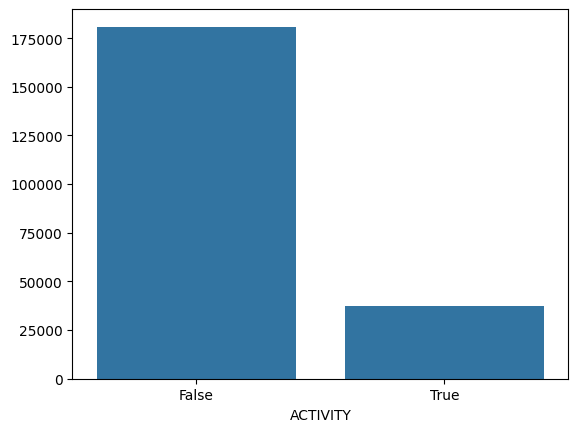

In [174]:
sns.barplot(x=final_df["ACTIVITY"].value_counts().index, y=final_df["ACTIVITY"].value_counts().values)

In [175]:
def create_dataset1(df: pd.DataFrame) -> pd.DataFrame:

    def get_activity(df: pd.DataFrame) -> bool:
        return list(df[df["STANDARD_VALUE"] == df["STANDARD_VALUE"].min()].loc[
            :, "ACTIVITY_COMMENT"
            ])[0]
    new_ds = []
    for i in range(len(df)):
        row = df.iloc[i]
        smiles = row[0]
        activity = get_activity(row[1])
        new_ds.append([smiles, activity])
    return pd.DataFrame(new_ds, columns=["SMILES", "ACTIVITY"])


In [176]:
final_df2 = create_dataset1(smiles_df)

In [177]:
final_df2.shape

(218266, 2)

In [178]:
final_df2["ACTIVITY"].value_counts()

ACTIVITY
inconclusive    109085
inactive         80571
active           28610
Name: count, dtype: int64

<Axes: xlabel='ACTIVITY'>

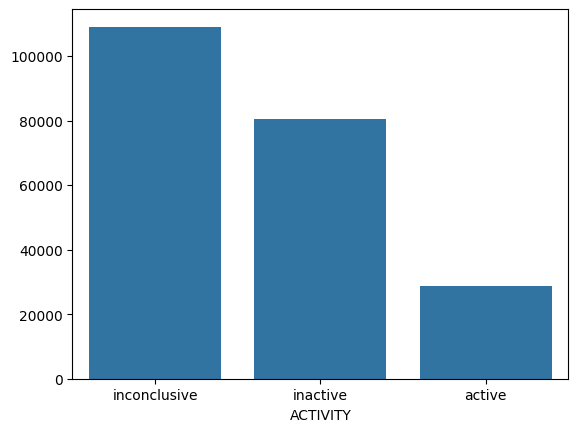

In [179]:
sns.barplot(x=final_df2["ACTIVITY"].value_counts().index, y=final_df2["ACTIVITY"].value_counts().values)

In [144]:
min = smiles_df.iloc[4,1]["STANDARD_VALUE"].min()

In [153]:
list(smiles_df.iloc[3, 1][smiles_df.iloc[3, 1]["STANDARD_VALUE"] == smiles_df.iloc[3, 1]["STANDARD_VALUE"].min()].loc[
            :, "ACTIVITY_COMMENT"]
)[0]

'Active'

In [12]:
pchembl_df = df[df.PCHEMBL_VALUE.notnull()]

In [13]:
pchembl_df

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
0,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.30,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
1,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.30,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
2,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.30,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
3,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.30,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
7,146,CHEMBL4,0,CC1COc2c(N3CCN(C)CC3)c(F)cc4C(=O)C(=CN1c24)C(=O)O,InChI=1S/C18H20FN3O4/c1-10-9-26-17-14-11(16(23...,361.37,-1.37,1.86,-0.39,73.32,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nat. Chem. Biol.,2009.0,NaN,19734910.0,NaN,PUBLICATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532404,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532405,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532406,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Antimicrob. Agents Chemother.,2007.0,NaN,17220424.0,NaN,PUBLICATION
532408,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Antimicrob. Agents Chemother.,2007.0,NaN,17220424.0,NaN,PUBLICATION


In [15]:
pchembl_df["STANDARD_UNITS"].unique()

array(['nM'], dtype=object)

In [27]:
len(df.query("STANDARD_UNITS == '%'"))

87716

In [37]:
df.query("STANDARD_UNITS == '%'")["ASSAY_DESCRIPTION"].values

array(['Antiplasmodial activity against Plasmodium vinckei petteri infected in Swiss mouse assessed as inhibition of parasite growth at 50 mg/kg/day, ip measured on day 4 postinfection',
       'Antiplasmodial activity against Plasmodium vinckei petteri infected in Swiss mouse assessed as inhibition of parasite growth at 100 mg/kg/day, ip measured on day 5 postinfection',
       'GSK_TCMDC: Percent inhibition of human HepG2 cell line. Test compounds present at 10uM.',
       ...,
       'GSK_TCMDC: Inhibition of Plasmodium falciparum 3D7 LDH activity, using an LDH reporter assay. Test compounds present at 2uM',
       'GSK_TCMDC: Inhibition of Plasmodium falciparum 3D7 in whole red blood cells, using parasite LDH activity as an index of growth. Test compounds present at 2uM',
       'GSK_TCMDC: Inhibition Frequency Index (IFI). The number of non-kinase HTS assays where a compound showed > 50 % inhibition, expressed as a percentage of the number of such assays in which the compound was 

In [32]:
df.query("STANDARD_UNITS == '%'")["STANDARD_VALUE"]

23        100.00
57        100.00
68          0.00
69          0.00
71          4.83
           ...  
532402      0.73
532407     79.00
532409      0.00
532410    100.00
532411      0.71
Name: STANDARD_VALUE, Length: 87716, dtype: float64

<Axes: xlabel='ASSAY_CATEGORY', ylabel='count'>

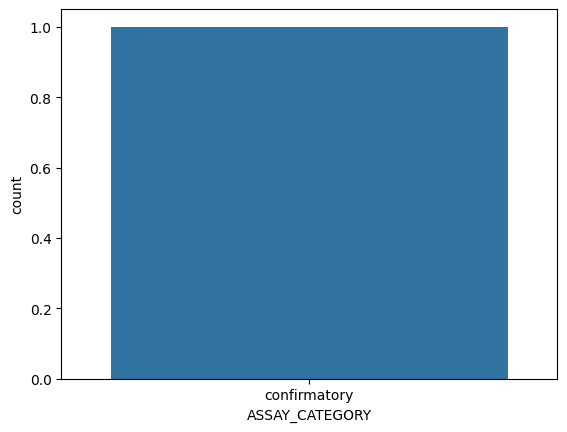

In [89]:
sns.countplot(df.ASSAY_CATEGORY.value_counts())

In [90]:
new_df = df[['MOLREGNO', 'CANONICAL_SMILES', 'ASSAY_DESCRIPTION', 'ASSAY_CATEGORY',
            'ASSAY_ORGANISM', 'STANDARD_VALUE', 'STANDARD_UNITS', 'PCHEMBL_VALUE', 
            'TARGET_TYPE', 'PREF_NAME', 'ORGANISM',]]

In [91]:
new_df

,MOLREGNO,CANONICAL_SMILES,ASSAY_DESCRIPTION,ASSAY_CATEGORY,ASSAY_ORGANISM,STANDARD_VALUE,STANDARD_UNITS,PCHEMBL_VALUE,TARGET_TYPE,PREF_NAME,ORGANISM
0,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,19952.60,nM,4.70,UNCHECKED,Unchecked,NaN
1,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,11220.20,nM,4.95,UNCHECKED,Unchecked,NaN
2,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,12589.30,nM,4.90,UNCHECKED,Unchecked,NaN
3,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,10000.00,nM,5.00,UNCHECKED,Unchecked,NaN
4,111,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2,PUBCHEM_BIOASSAY: Primary qHTS for delayed dea...,confirmatory,Plasmodium falciparum,13115.40,nM,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
...,...,...,...,...,...,...,...,...,...,...,...
532408,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,Growth inhibition after 72 hrs of Plasmodium f...,NaN,Plasmodium falciparum,22.20,nM,7.65,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532409,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition of Plasmodium falciparum...,NaN,Plasmodium falciparum,0.00,%,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532410,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition of Plasmodium falciparum...,NaN,Plasmodium falciparum,100.00,%,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532411,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition Frequency Index (IFI). T...,NaN,NaN,0.71,%,NaN,UNCHECKED,Unchecked,NaN


In [92]:
list(new_df.ASSAY_DESCRIPTION.unique())

['PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line 3D7. (Class of assay: confirmatory) [Related PubChem assays: 1815 (Assay for Plasmodium falciparum line 7G8), 1816 (Assay for Plasmodium falciparum line GB4), 1828 (Summary assay)]',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line W2. (Class of assay: confirmatory) [Related PubChem assays: 1815 (Assay for Plasmodium falciparum line 7G8), 1877 (Assay for Plasmodium falciparum line D10), 1816 (Assay for Plasmodium falciparum line GB4), 1876 (Assay for Plasmodium falciparum line 7D3), 1828 (Summary assay)]',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line 7G8. (Class of assay: confirmatory) ',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line GB4. (Class of assay: confirmatory) ',
 'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibito

In [93]:
list(new_df.STANDARD_UNITS.unique())

['nM',
 nan,
 '%',
 'ug.mL-1',
 'ng/ml',
 'days',
 'mg kg-1 day-1',
 'um',
 'mg Kg-1',
 'mg kg-1',
 'day',
 'mg.kg-1',
 'ug ml-1',
 'nM hr',
 'mg kg-1 day-1 x 5',
 'mg/kg/day',
 'mg ml-1',
 'uM kg-1',
 'ng ml-1',
 'umol.kg-1',
 'mL.min-1.kg-1',
 "10'-8mol",
 'milliequivalent',
 'uM',
 'L.kg-1',
 'molar ratio',
 'hr',
 'ug well-1',
 'uM well-1',
 'Cures/total',
 'min-1',
 's-1',
 'M-1 s-1',
 'ng.hr/ml',
 'hr.ng/ml',
 'mg kg-1 day-1 x 4',
 'MST',
 'nM g-1',
 'ml/min',
 'l',
 'ng hr ml-1',
 'uM ml-1',
 'pM mg-1',
 'nM hr-1 mg-1',
 'mU mg-1',
 'nM mg-1',
 'mg mg-1',
 'hr-1',
 "10'6/M",
 "10'7/M",
 'mmHg',
 'uM hr',
 'min',
 'uL min-1 mg-1',
 "10'5/M",
 'ug',
 'M-1 min-1',
 'uM.min',
 'cpm/uL',
 'mL.min-1.g-1',
 'nm/s',
 '10-6 cm/s',
 '%,%',
 'g']

In [94]:
df.MOLREGNO.duplicated().sum()

np.int64(266106)

In [95]:
new_df["STANDARD_VALUE"].aggregate("mean")

np.float64(1263969.659520729)

In [96]:
su = new_df['STANDARD_UNITS']

su.head()

0    nM
1    nM
2    nM
3    nM
4    nM
Name: STANDARD_UNITS, dtype: object

In [97]:
units_df = pd.DataFrame(df[df["STANDARD_UNITS"].notnull()].groupby("MOLREGNO")["STANDARD_UNITS"].unique())

In [98]:
units_df["No Units"] = units_df['STANDARD_UNITS'].apply(lambda x: len(x))

In [99]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264366 entries, 23 to 1540450
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   STANDARD_UNITS  264366 non-null  object
 1   No Units        264366 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [100]:
units_df.rename(columns={"No Units": "no_units"}, inplace=True)

In [101]:
units_df

,STANDARD_UNITS,no_units
MOLREGNO,,
23,[nM],1
111,[nM],1
146,[nM],1
147,[nM],1
148,"[nM, %, ug.mL-1, ng/ml]",4
...,...,...
1531021,[ug.mL-1],1
1531022,[ug.mL-1],1
1531023,[ug.mL-1],1


In [102]:
units_df.query("no_units != 1")

,STANDARD_UNITS,no_units
MOLREGNO,,
148,"[nM, %, ug.mL-1, ng/ml]",4
236,"[%, nM]",2
241,"[nM, %, ug.mL-1]",3
322,"[%, nM]",2
1024,"[nM, %]",2
...,...,...
1529184,"[%, nM]",2
1529185,"[nM, %]",2
1529186,"[%, nM]",2


In [103]:
units_df[units_df.STANDARD_UNITS.apply(lambda x: "%" in x)]

,STANDARD_UNITS,no_units
MOLREGNO,,
148,"[nM, %, ug.mL-1, ng/ml]",4
236,"[%, nM]",2
241,"[nM, %, ug.mL-1]",3
322,"[%, nM]",2
1024,"[nM, %]",2
...,...,...
1529184,"[%, nM]",2
1529185,"[nM, %]",2
1529186,"[%, nM]",2


In [107]:
n_units_count

no_units
1     241542
2      21629
3        980
4        130
5         58
6         10
9          3
7          3
10         3
8          2
11         2
15         1
25         1
14         1
12         1
Name: count, dtype: int64

<BarContainer object of 15 artists>

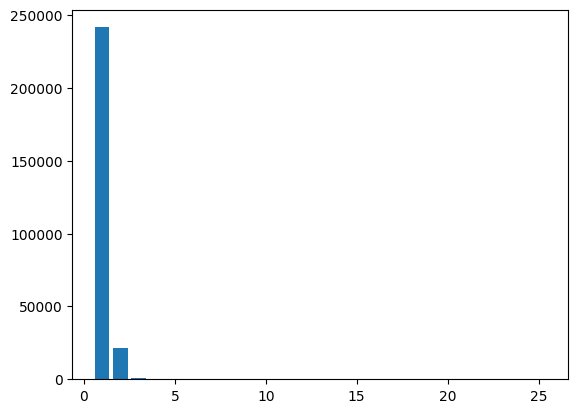

In [114]:
n_units_count = units_df.no_units.value_counts()
plt.bar(n_units_count.index, height=n_units_count.values, )

In [115]:
units_df.query("no_units > 4")

,STANDARD_UNITS,no_units
MOLREGNO,,
2080,"[nM, ug.mL-1, days, %, um, mg Kg-1, mg kg-1 da...",8
6579,"[nM, %, ug.mL-1, mg kg-1, day, days, mg.kg-1, ...",25
6936,"[nM, ug.mL-1, mg kg-1 day-1, %, mg.kg-1, days,...",15
9459,"[%, ug.mL-1, nM, days, um]",5
10389,"[ug.mL-1, nM, days, day, umol.kg-1, %, mg/kg/d...",10
...,...,...
1203056,"[mL.min-1.g-1, ug.mL-1, hr, %, nM]",5
1264978,"[day, mg kg-1, mg.kg-1, nM, %]",5
1281805,"[nM, uM.min, mg kg-1, mg.kg-1, hr]",5


In [116]:
df.query("MOLREGNO == 2080")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
542,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,SINGLE PROTEIN,Dihydrofolate reductase,Plasmodium falciparum K1,CHEMBL1939,J. Med. Chem.,2004.0,NaN,15293997.0,NaN,PUBLICATION
543,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum (isolate K1 / Thailand),Plasmodium falciparum K1,CHEMBL612856,Bioorg. Med. Chem. Lett.,2005.0,NaN,15780626.0,NaN,PUBLICATION
544,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium berghei,Plasmodium berghei,CHEMBL612653,J. Med. Chem.,1984.0,NaN,6502605.0,NaN,PUBLICATION
545,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum (isolate K1 / Thailand),Plasmodium falciparum K1,CHEMBL612856,Bioorg. Med. Chem. Lett.,2005.0,NaN,15878272.0,NaN,PUBLICATION
546,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Science,2010.0,NaN,20813948.0,NaN,PUBLICATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Antimicrob. Agents Chemother.,2007.0,NaN,17875995.0,NaN,PUBLICATION
795,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Antimicrob. Agents Chemother.,2010.0,NaN,20350951.0,NaN,PUBLICATION
796,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,SINGLE PROTEIN,Dihydrofolate reductase,Plasmodium falciparum K1,CHEMBL1939,J. Med. Chem.,2002.0,NaN,11881993.0,NaN,PUBLICATION
797,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Bioorg. Med. Chem. Lett.,2008.0,NaN,18039570.0,NaN,PUBLICATION


In [117]:
df.DOC_TYPE.value_counts()

DOC_TYPE
DATASET        343366
PUBLICATION    189047
Name: count, dtype: int64

In [120]:
df.query("DOC_TYPE == 'DATASET'")["STANDARD_UNITS"].value_counts()

STANDARD_UNITS
nM               326679
%                  7695
ug.mL-1            5766
uM                 1050
hr                  248
mL.min-1.g-1        234
day                  65
nm/s                 16
10-6 cm/s            10
uL min-1 mg-1         7
min                   7
%,%                   3
Name: count, dtype: int64

In [121]:
df.query("DOC_TYPE == 'PUBLICATION'")["STANDARD_UNITS"].value_counts()

STANDARD_UNITS
%                    80021
nM                   72203
ug.mL-1               5315
days                  3317
mg.kg-1                593
day                    502
mg kg-1                409
um                     315
mg kg-1 day-1          244
ng ml-1                200
uM well-1              104
Cures/total             94
mg/kg/day               79
hr                      70
ug ml-1                 58
mg kg-1 day-1 x 5       46
uM                      40
umol.kg-1               39
ug well-1               24
ng.hr/ml                23
uM kg-1                 23
ng/ml                   20
milliequivalent         20
mg Kg-1                 12
pM mg-1                 12
min-1                   11
M-1 s-1                 10
s-1                     10
mg ml-1                  9
L.kg-1                   9
mL.min-1.kg-1            9
cpm/uL                   8
molar ratio              8
nM hr                    6
mU mg-1                  6
l                        6
mg kg-1 day-1

In [ ]:
df.query("STANDARD_UNITS == '%'")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
23,148,CHEMBL6246,0,Oc1cc2C(=O)Oc3c(O)c(O)cc4C(=O)Oc(c1O)c2c34,InChI=1S/C14H6O8/c15-5-1-3-7-8-4(14(20)22-11(7...,302.19,1.58,0.24,-3.38,133.52,...,ORGANISM,Plasmodium vinckei petteri,Plasmodium vinckei petteri,CHEMBL613012,Antimicrob. Agents Chemother.,2009.0,NaN,19015354.0,NaN,PUBLICATION
57,148,CHEMBL6246,0,Oc1cc2C(=O)Oc3c(O)c(O)cc4C(=O)Oc(c1O)c2c34,InChI=1S/C14H6O8/c15-5-1-3-7-8-4(14(20)22-11(7...,302.19,1.58,0.24,-3.38,133.52,...,ORGANISM,Plasmodium vinckei petteri,Plasmodium vinckei petteri,CHEMBL613012,Antimicrob. Agents Chemother.,2009.0,NaN,19015354.0,NaN,PUBLICATION
68,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,CELL-LINE,HepG2,Homo sapiens,CHEMBL395,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
69,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
71,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532402,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532407,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532409,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532410,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION


In [ ]:
units_df = units_df.join(
    pd.DataFrame(df[df["STANDARD_UNITS"].notnull()].groupby(
        "MOLREGNO"
        )["ASSAY_DESCRIPTION"].unique()))

In [ ]:
list(units_df.query("no_units != 1")["ASSAY_DESCRIPTION"])

[array(['Inhibition of Plasmodium falciparum thioredoxin reductase by DTNB assay',
        'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibitors of the malarial parasite plastid, 96 hour incubation.   (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID488745, AID488752, AID488774, AID504848, AID504850]',
        'Antiplasmodial activity against chloroquine-resistant Plasmodium falciparum K1',
        'Antiplasmodial activity against Plasmodium vinckei petteri infected in Swiss mouse assessed as inhibition of parasite growth at 50 mg/kg/day, ip measured on day 4 postinfection',
        'Antiplasmodial activity against Plasmodium falciparum Dd2',
        'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibitors of the malarial parasite plastid, 48 hour incubation.   (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID488752, AID488774, AID504848, AID504850]',
        'Antiplasmodial activity against Plasmodium falciparum W2',

In [ ]:
df.query("ASSAY_CATEGORY == 'confirmation'")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE


In [ ]:
df['ASSAY_DESCRIPTION']

0         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
1         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
2         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
3         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
4         PUBCHEM_BIOASSAY: Primary qHTS for delayed dea...
                                ...                        
532408    Growth inhibition after 72 hrs of Plasmodium f...
532409    GSK_TCMDC: Inhibition of Plasmodium falciparum...
532410    GSK_TCMDC: Inhibition of Plasmodium falciparum...
532411    GSK_TCMDC: Inhibition Frequency Index (IFI). T...
532412    Growth inhibition after 72 hrs of Plasmodium f...
Name: ASSAY_DESCRIPTION, Length: 532413, dtype: object

In [141]:
df = pd.read_csv("../data/Virtual-Screening.csv")

In [142]:
df.head()

,SMILES,ACTIVITY
0,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2,True
1,Br.Br.NC(=N)SCCc1c[nH]cn1,False
2,Br.Br.NC(=N)SCCc1ccc(CCSC(=N)N)cc1,True
3,Br.Br.NC(=N)SCCc1cccc(CCSC(=N)N)c1,True
4,Br.Br.NCCSC(=N)N,False


In [143]:
df["ACTIVITY"].value_counts()

ACTIVITY
False    181781
True      37392
Name: count, dtype: int64

In [144]:
df["ACTIVITY"] = df["ACTIVITY"].apply(lambda x: 1 if x is True else 0)

In [145]:
df["ACTIVITY"].value_counts()

ACTIVITY
0    181781
1     37392
Name: count, dtype: int64

In [5]:
from rdkit import Chem

In [146]:
df["Mol"] = df.SMILES.apply(lambda x: Chem.MolFromSmiles(x))

In [147]:
df.head()

,SMILES,ACTIVITY,Mol
0,Br.Br.CNCCCCCNCCC1CC2CCCC(C1)C2,1,<rdkit.Chem.rdchem.Mol object at 0x7fca1b8a1150>
1,Br.Br.NC(=N)SCCc1c[nH]cn1,0,<rdkit.Chem.rdchem.Mol object at 0x7fca1b8a1930>
2,Br.Br.NC(=N)SCCc1ccc(CCSC(=N)N)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x7fca1b8a19a0>
3,Br.Br.NC(=N)SCCc1cccc(CCSC(=N)N)c1,1,<rdkit.Chem.rdchem.Mol object at 0x7fca1b8a1a10>
4,Br.Br.NCCSC(=N)N,0,<rdkit.Chem.rdchem.Mol object at 0x7fca1b8a1a80>


In [148]:
from typing import Tuple
import pandas as pd
import lohi_splitter as lohi
import random

In [11]:
def split_dataset(df: pd.DataFrame, 
                  similarity_threshold: float, 
                  train_frac: float,
                  test_frac: float,
                  coarsening_frac: float=0.4,
                  max_mip_gap: float=0.01) -> Tuple[pd.DataFrame]:
    """
    Splits the data into train and test set using Lo-Hi splitter
    ref: https://arxiv.org/abs/2310.06399

    Argument(s)
    ------------
    df: pd.DataFrame \n
        dataframe containing our smiles and activity information
    similarity_threshhold: float \n
        max similarity based on Tanimoto similarity that should exist \
        between training and test set
    train_frac: float \n
        min fraction of the dataset that should be in the train set
    test_frac: float \n
        min fraction of the dataset that should be in the test set
    coarsening_frac: float \n
        threshold for graph clustering, used to tune the fraction \
        of data to drop and how fast the computation should be
    max_mip_gap: float (range 0-1)
        how close to theoretical optimum to terminate operation, used \
        to tune the fraction of data to drop and how fast the computation \
        should be. Higher value to run faster and discard more molecules

    Return(s)
    -----------
    splits: Tuple[pd.DataFrame]
        the splitted dataset in the order (train, test)
    """

    smiles = df["SMILES"].to_list()
    train_test_partition = lohi.hi_train_test_split(
                                smiles=smiles, 
                                similarity_threshold=similarity_threshold, 
                                train_min_frac=train_frac, 
                                test_min_frac=test_frac, 
                                coarsening_threshold=coarsening_frac,
                                max_mip_gap=max_mip_gap
                                )
    train_df = df.iloc[train_test_partition[0]]
    test_df = df.iloc[train_test_partition[1]]
    return (train_df, test_df)

In [52]:
idx = random.choices(list(range(len(df))), k=500,)
small_df = df.iloc[idx]
train_frac = 0.7
test_frac = 0.3

In [13]:
train_df, test_df = split_dataset(small_df, 
                                  similarity_threshold=0.4,
                                  train_frac=train_frac,
                                  test_frac=train_frac)


TypeError: iteration over a 0-d array

In [17]:
small_df

,SMILES,ACTIVITY,Mol
29017,CC1CCCN(Cc2c(O)ccc3C(=O)C(=COc23)c4ccc(Cl)cc4)C1,1,<rdkit.Chem.rdchem.Mol object at 0x7fbeea8de5e0>
190871,Nc1nn2c(O)c3CCCCc3nc2c1N=Nc4ccccc4,1,<rdkit.Chem.rdchem.Mol object at 0x7fbe3d5473e0>
79308,CN1C(=O)N(C)c2nc(SCC(=O)Nc3ccccc3N4CCCCC4)n(C)...,1,<rdkit.Chem.rdchem.Mol object at 0x7fbec7349b60>
36541,CCCCCC(=O)Nc1cccc(c1)C2=NOC3(C[C@@H](N(C3)C(=O...,1,<rdkit.Chem.rdchem.Mol object at 0x7fbef4eadee0>
19523,CC(C)c1nnc(SCC(=O)NNC(=O)c2ccc(C)cc2)n1C,1,<rdkit.Chem.rdchem.Mol object at 0x7fbf01bd87b0>
...,...,...,...
163265,Cc1onc(c2ccccc2Cl)c1C(=O)NCCc3cc4cc(C)c(C)cc4nc3O,1,<rdkit.Chem.rdchem.Mol object at 0x7fbe60a4db60>
68037,CCc1ccc(\C=C\2/Oc3c(CN4CCN(C)CC4)c(O)ccc3C2=O)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x7fbebd512c70>
209526,Oc1c2CCCCc2nc3cc(nn13)c4ccc(F)cc4,1,<rdkit.Chem.rdchem.Mol object at 0x7fbe31249e00>
734,Brc1ccc(NC(=O)CC2SC(=O)N(C2=O)c3ccccc3)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x7fbf15c9e260>


In [14]:
smiles = small_df["SMILES"].to_list()

In [ ]:
smiles

In [18]:
# mols = [Chem.MolFromSmiles(s) for s in smiles]
mols = small_df.Mol.to_list()

In [ ]:
train_test_partition = lohi.hi_train_test_split(
                                smiles=df["SMILES"].to_list(), 
                                similarity_threshold=0.4, 
                                train_min_frac=0.6, 
                                test_min_frac=0.2, )
                                # coarsening_threshold=coarsening_frac,
                                # max_mip_gap=max_mip_gap
                                # )

In [21]:
train = small_df.iloc[train_test_partition[0]]

test = small_df.iloc[train_test_partition[1]]

In [22]:
len(train), len(train)/len(small_df), len(test), len(test)/len(small_df)

(374, 0.748, 125, 0.25)

In [149]:
from rdkit.Chem import rdFingerprintGenerator

fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)

In [113]:
fp = [fpgs.GetFingerprint(m) for m in mols]

In [114]:
fp

In [ ]:
node_a = random.choice()

In [115]:
nodes_idx = random.choices(list(range(len(fp))), k=10)
nodes = [fp[x] for x in nodes_idx]

In [116]:
nodes, nodes_idx

([<rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7fbe20f02ab0>,
 [355, 3, 22, 453, 397, 175, 80, 296, 261, 109])

In [55]:
from rdkit import DataStructs

In [117]:
sim = []
for f in nodes:
    sim.append(DataStructs.BulkTanimotoSimilarity(f, nodes))

In [118]:
sim

[[1.0,
  0.1651376146788991,
  0.10869565217391304,
  0.1282051282051282,
  0.09876543209876543,
  0.09876543209876543,
  0.0989010989010989,
  0.09782608695652174,
  0.1935483870967742,
  0.13953488372093023],
 [0.1651376146788991,
  1.0,
  0.09174311926605505,
  0.08247422680412371,
  0.09278350515463918,
  0.08163265306122448,
  0.10377358490566038,
  0.08256880733944955,
  0.14285714285714285,
  0.15],
 [0.10869565217391304,
  0.09174311926605505,
  1.0,
  0.06666666666666667,
  0.15714285714285714,
  0.14084507042253522,
  0.10843373493975904,
  0.14814814814814814,
  0.10752688172043011,
  0.1111111111111111],
 [0.1282051282051282,
  0.08247422680412371,
  0.06666666666666667,
  1.0,
  0.08064516129032258,
  0.15517241379310345,
  0.09859154929577464,
  0.1791044776119403,
  0.07228915662650602,
  0.07042253521126761],
 [0.09876543209876543,
  0.09278350515463918,
  0.15714285714285714,
  0.08064516129032258,
  1.0,
  0.07936507936507936,
  0.09722222222222222,
  0.08108108108108

In [119]:
import numpy as np


sim_idx = np.argsort(sim, )

In [120]:
sim_idx

array([[7, 4, 5, 6, 2, 3, 9, 1, 8, 0],
       [5, 3, 7, 2, 4, 6, 8, 9, 0, 1],
       [3, 1, 8, 6, 0, 9, 5, 7, 4, 2],
       [2, 9, 8, 4, 1, 6, 0, 5, 7, 3],
       [5, 3, 7, 1, 6, 8, 0, 9, 2, 4],
       [9, 4, 1, 8, 6, 0, 2, 3, 7, 5],
       [7, 4, 5, 3, 0, 1, 2, 9, 8, 6],
       [6, 4, 1, 9, 0, 8, 2, 3, 5, 7],
       [3, 5, 4, 2, 7, 6, 1, 9, 0, 8],
       [5, 3, 7, 2, 6, 4, 0, 1, 8, 9]])

In [121]:
sim_idx[0, 0]

np.int64(7)

In [122]:
for i, j in enumerate(sim_idx[:, 0]):
    print(i,j)

0 7
1 5
2 3
3 2
4 5
5 9
6 7
7 6
8 3
9 5


In [123]:
sim[0][7]

0.09782608695652174

In [124]:
for i, j in enumerate(sim_idx[:, 0]):
    print("index: ", i, j, end="; ")
    print("value: ", sim[i][j], end="; ")
    print("nodes: ", nodes_idx[i], nodes_idx[j])

index:  0 7; value:  0.09782608695652174; nodes:  355 296
index:  1 5; value:  0.08163265306122448; nodes:  3 175
index:  2 3; value:  0.06666666666666667; nodes:  22 453
index:  3 2; value:  0.06666666666666667; nodes:  453 22
index:  4 5; value:  0.07936507936507936; nodes:  397 175
index:  5 9; value:  0.06944444444444445; nodes:  175 109
index:  6 7; value:  0.07058823529411765; nodes:  80 296
index:  7 6; value:  0.07058823529411765; nodes:  296 80
index:  8 3; value:  0.07228915662650602; nodes:  261 453
index:  9 5; value:  0.06944444444444445; nodes:  109 175


In [109]:
from typing import List


def segregate(
        df: pd.DataFrame, node_a: int, node_b: int
        ) -> List[pd.DataFrame]:
    df = df.reset_index()
    fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)

    node_a_mol = fpgs.GetFingerprint(df.loc[node_a, "Mol"])
    node_b_mol = fpgs.GetFingerprint(df.loc[node_b, "Mol"])

    mols = fpgs.GetFingerprints(df["Mol"].to_list())
    splitted = []
    for i, node in enumerate([node_a_mol, node_b_mol]):
        node_a_sim = DataStructs.BulkTanimotoSimilarity(node, mols)
        less_than_0_4 = map(lambda x: True if x <=0.4 else False, node_a_sim)
        nodes = [x for x, y in zip(list(df.index), less_than_0_4,) if y is True]
        print(f'Group {i+1}: Number = {len(nodes)}, Fraction: {len(nodes)/ len(df)}')
        splitted.append(df.iloc[nodes])
    return splitted



In [186]:
a = [0, 1, 2,3 ,4,5, 6, 7,8, 9]
a.reverse()
a

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [187]:
a.remove(0)

In [199]:
a.pop(0)

9

In [201]:
a = np.array(a)

In [202]:
a > 5

array([ True,  True,  True, False, False, False, False, False])

In [214]:
import numpy as np

In [233]:
0.400000001 > 0.4

True

In [356]:
idx = random.choices(list(range(len(df))), k=500,)
small_df = df.iloc[idx]

In [367]:
def split(df, test_size, threshold):
    test_no = int(test_size * len(df))
    test_dataset = []
    fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)


    smiles = df.SMILES.to_list()
    mols = [Chem.MolFromSmiles(x) for x in smiles]
    fps = [fpgs.GetFingerprint(x) for x in mols]
    fps_idx = list(np.arange(len(fps)))

    n = 0
    new_points = [np.random.choice(fps_idx)]
    while len(test_dataset) < test_no:
        idx = new_points[n]
        mol_fgp = fps[idx]
        if idx in fps_idx:
            fps_idx.remove(idx)
        sim = np.array(
            DataStructs.BulkTanimotoSimilarity(mol_fgp, [fps[i] for i in fps_idx])
            )
        sim_comp = sim > threshold
        
        test_dataset.append(idx)
        if sum(sim_comp) > 0:
            # print(sim_comp)
            greater = [i for i, j in enumerate(sim_comp) if j == True]
            print(sum(sim_comp), greater)
            print(f"\n Sum of values above threshhold: {len(greater)}", end=" ")
            for i in greater:
                idx_value = fps_idx[i]
                fps_idx.remove(idx_value)
                new_points.append(idx_value)
        if len(new_points) == n+1:
            again = True
            while again:
                new_idx = np.random.choice(fps_idx)
                if new_idx not in new_points:
                    new_points.append(new_idx)
                    fps_idx.remove(new_idx)
                    again = False        
        n += 1
    return np.array(test_dataset), np.array(fps_idx), new_points



In [368]:
test, train, others = split(small_df, test_frac, threshold=0.4)

1 [317]

 Sum of values above threshhold: 1 1 [244]

 Sum of values above threshhold: 1 1 [82]

 Sum of values above threshhold: 1 2 [73, 422]

 Sum of values above threshhold: 2 3 [168, 406, 421]

 Sum of values above threshhold: 3 1 [390]

 Sum of values above threshhold: 1 1 [10]

 Sum of values above threshhold: 1 2 [404, 457]

 Sum of values above threshhold: 2 1 [253]

 Sum of values above threshhold: 1 1 [311]

 Sum of values above threshhold: 1 2 [190, 230]

 Sum of values above threshhold: 2 1 [326]

 Sum of values above threshhold: 1 1 [183]

 Sum of values above threshhold: 1 1 [94]

 Sum of values above threshhold: 1 1 [354]

 Sum of values above threshhold: 1 1 [363]

 Sum of values above threshhold: 1 1 [243]

 Sum of values above threshhold: 1 1 [50]

 Sum of values above threshhold: 1 1 [115]

 Sum of values above threshhold: 1 1 [115]

 Sum of values above threshhold: 1 1 [177]

 Sum of values above threshhold: 1 1 [38]

 Sum of values above threshhold: 1 1 [75]

 Sum 

In [358]:
test

array([ 29, 313,  75, 115, 296, 427, 485, 394,   3, 240, 103, 476,  57,
       347, 479, 261, 214, 447, 367, 172, 434, 127, 443, 291,  64, 270,
        21, 219, 226,  52,  73, 400, 243,  61, 149, 114, 366, 493, 288,
         0, 373,  72, 234, 461,  43, 389, 337, 449,  16, 472, 204, 429,
       455, 421, 433, 179, 283, 191, 328, 309, 339, 123, 235,  70, 217,
       408,  37, 378, 470,   8, 344, 228, 334, 159,  48,  49, 409, 285,
       212,  14, 258,  34,  99, 361, 364,  83,  30, 323,  54,  69, 195,
       422, 181,  98, 325, 221, 160, 140, 414, 267, 297, 222,  46, 345,
       376, 486, 354, 458, 294, 351, 274,  65, 379, 124, 482, 440, 236,
       185, 262, 145, 129, 271, 423, 254, 318,  31, 335, 252, 245, 276,
       346, 317, 213, 370, 259, 342, 102, 174, 494, 293,  92,  11, 310,
       299, 182,   5, 263, 202, 392, 295])

In [359]:
np.array(others)

array([ 29, 313,  75, 115, 296, 427, 485, 394,   3, 240, 103, 476,  57,
       347, 479, 261, 214, 447, 367, 172, 434, 127, 443, 291,  64, 270,
        21, 219, 226,  52,  73, 400, 243,  61, 149, 114, 366, 493, 288,
         0, 373,  72, 234, 461,  43, 389, 337, 449,  16, 472, 204, 429,
       455, 421, 433, 179, 283, 191, 328, 309, 339, 123, 235,  70, 217,
       408,  37, 378, 470,   8, 344, 228, 334, 159,  48,  49, 409, 285,
       212,  14, 258,  34,  99, 361, 364,  83,  30, 323,  54,  69, 195,
       422, 181,  98, 325, 221, 160, 140, 414, 267, 297, 222,  46, 345,
       376, 486, 354, 458, 294, 351, 274,  65, 379, 124, 482, 440, 236,
       185, 262, 145, 129, 271, 423, 254, 318,  31, 335, 252, 245, 276,
       346, 317, 213, 370, 259, 342, 102, 174, 494, 293,  92,  11, 310,
       299, 182,   5, 263, 202, 392, 295, 484])

In [350]:
len(test), len(train)

(150, 349)

In [360]:
small_df = small_df.reset_index()

In [361]:
small_df

,index,SMILES,ACTIVITY,Mol
0,145699,Cc1ccc(cc1)C(=O)Oc2ccc(Br)cc2C(=S)N3CCOCC3,0,<rdkit.Chem.rdchem.Mol object at 0x7fc98e4b4c10>
1,185615,Fc1ccccc1\C=C/2\Sc3ccc(cc3NC2=O)C(=O)NCCCN4CCOCC4,0,<rdkit.Chem.rdchem.Mol object at 0x7fc95f201e00>
2,94854,COc1cc(NC(=O)c2ccccc2C)c(OC)cc1NC(=O)CN3CCOCC3,0,<rdkit.Chem.rdchem.Mol object at 0x7fc9bc03a1f0>
3,107433,COc1ccc(OC)c(NC(=O)CSc2nc(nc(n2)N3CCOCC3)N4CCO...,0,<rdkit.Chem.rdchem.Mol object at 0x7fc9a6495230>
4,109979,COc1ccc(cc1)C(=O)N2CC3(C[C@H]2C(=O)N)CC(=NO3)c...,0,<rdkit.Chem.rdchem.Mol object at 0x7fc9a64db5a0>
...,...,...,...,...
495,141905,Cc1ccc(NC(=O)CN(c2ccc(Cl)cc2)S(=O)(=O)c3cc(ccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7fc98e44c190>
496,12709,CC(C)(C)c1ccnc(c1)c2cc(ccn2)C(C)(C)C,0,<rdkit.Chem.rdchem.Mol object at 0x7fca1a86c120>
497,152186,Cc1cccc(N=C(S)NCCc2ccccc2)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x7fc978a67ae0>
498,177510,Cn1nnc2cc(ccc12)C(=O)N(CC=C)c3ccccc3,0,<rdkit.Chem.rdchem.Mol object at 0x7fc954c22490>


In [362]:
train_smiles = small_df.loc[list(train), "SMILES"]

In [363]:
fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)    

train_mols = [Chem.MolFromSmiles(x) for x in train_smiles]
train_fps = [fpgs.GetFingerprint(x) for x in train_mols]

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

Index 296, value 0.4318181818181818 
Compound in idex 115 failed
Index 259, value 0.48333333333333334 
Compound in idex 408 failed
Index 225, value 0.4423076923076923 
Compound in idex 83 failed


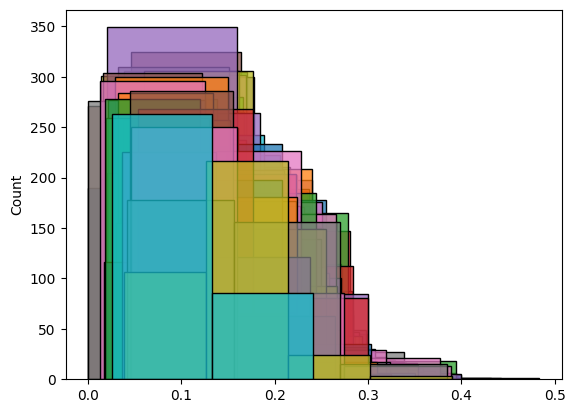

In [364]:
for i in list(test):
    smiles = small_df.loc[i, 'SMILES']
    mol = Chem.MolFromSmiles(smiles)
    fp = fpgs.GetFingerprint(mol)
    sim  = np.array(DataStructs.BulkTanimotoSimilarity(fp, train_fps))
    if sum(sim > 0.4) != 0:
        for j, s in enumerate(sim):
            if s > 0.4:
                print(f"Index {j}, value {s}", end=" ")
        print(f"\nCompound in idex {i} failed")
    sns.histplot(sim, binwidth=0.1)


In [267]:
idx = np.random.choice(len(df), 10)

In [268]:
idx

array([ 51328, 162713,  39867,  59027,  68127, 173651,  24141, 210960,
       152997,  52329])

In [269]:
smiles = df.loc[idx, "SMILES"].to_list()
mols = [Chem.MolFromSmiles(x) for x in smiles]
fps = [fpgs.GetFingerprint(x) for x in mols]


sim_1 = []
for v in fps:
    sim_1.append(DataStructs.BulkTanimotoSimilarity(v, fps))

sim_1 = np.array(sim)

[[1.0,
  0.125,
  0.14492753623188406,
  0.19540229885057472,
  0.1728395061728395,
  0.10752688172043011,
  0.1282051282051282,
  0.12643678160919541,
  0.1038961038961039,
  0.22093023255813954],
 [0.125,
  1.0,
  0.17647058823529413,
  0.14864864864864866,
  0.20634920634920634,
  0.18309859154929578,
  0.21052631578947367,
  0.12857142857142856,
  0.13793103448275862,
  0.14666666666666667],
 [0.14492753623188406,
  0.17647058823529413,
  1.0,
  0.1527777777777778,
  0.1935483870967742,
  0.1388888888888889,
  0.13559322033898305,
  0.11594202898550725,
  0.12280701754385964,
  0.1506849315068493],
 [0.19540229885057472,
  0.14864864864864866,
  0.1527777777777778,
  1.0,
  0.1511627906976744,
  0.13829787234042554,
  0.13580246913580246,
  0.12087912087912088,
  0.15584415584415584,
  0.17204301075268819],
 [0.1728395061728395,
  0.20634920634920634,
  0.1935483870967742,
  0.1511627906976744,
  1.0,
  0.13953488372093023,
  0.25757575757575757,
  0.13414634146341464,
  0.12676056

In [271]:
sim_1 = np.array(sim_1)
sim_1

array([[1.        , 0.125     , 0.14492754, 0.1954023 , 0.17283951,
        0.10752688, 0.12820513, 0.12643678, 0.1038961 , 0.22093023],
       [0.125     , 1.        , 0.17647059, 0.14864865, 0.20634921,
        0.18309859, 0.21052632, 0.12857143, 0.13793103, 0.14666667],
       [0.14492754, 0.17647059, 1.        , 0.15277778, 0.19354839,
        0.13888889, 0.13559322, 0.11594203, 0.12280702, 0.15068493],
       [0.1954023 , 0.14864865, 0.15277778, 1.        , 0.15116279,
        0.13829787, 0.13580247, 0.12087912, 0.15584416, 0.17204301],
       [0.17283951, 0.20634921, 0.19354839, 0.15116279, 1.        ,
        0.13953488, 0.25757576, 0.13414634, 0.12676056, 0.19047619],
       [0.10752688, 0.18309859, 0.13888889, 0.13829787, 0.13953488,
        1.        , 0.12345679, 0.16091954, 0.11392405, 0.13684211],
       [0.12820513, 0.21052632, 0.13559322, 0.13580247, 0.25757576,
        0.12345679, 1.        , 0.14666667, 0.140625  , 0.1625    ],
       [0.12643678, 0.12857143, 0.1159420

In [273]:
smiles = df.loc[idx, "SMILES"].to_list()
mols = [Chem.MolFromSmiles(x) for x in smiles]
fps = [fpgs.GetFingerprint(x) for x in mols]


sim_2 = []
for v in fps:
    sim_2.append(DataStructs.BulkTanimotoSimilarity(v, fps))

sim_2 = np.array(sim_2)
sim_2

array([[1.        , 0.125     , 0.14492754, 0.1954023 , 0.17283951,
        0.10752688, 0.12820513, 0.12643678, 0.1038961 , 0.22093023],
       [0.125     , 1.        , 0.17647059, 0.14864865, 0.20634921,
        0.18309859, 0.21052632, 0.12857143, 0.13793103, 0.14666667],
       [0.14492754, 0.17647059, 1.        , 0.15277778, 0.19354839,
        0.13888889, 0.13559322, 0.11594203, 0.12280702, 0.15068493],
       [0.1954023 , 0.14864865, 0.15277778, 1.        , 0.15116279,
        0.13829787, 0.13580247, 0.12087912, 0.15584416, 0.17204301],
       [0.17283951, 0.20634921, 0.19354839, 0.15116279, 1.        ,
        0.13953488, 0.25757576, 0.13414634, 0.12676056, 0.19047619],
       [0.10752688, 0.18309859, 0.13888889, 0.13829787, 0.13953488,
        1.        , 0.12345679, 0.16091954, 0.11392405, 0.13684211],
       [0.12820513, 0.21052632, 0.13559322, 0.13580247, 0.25757576,
        0.12345679, 1.        , 0.14666667, 0.140625  , 0.1625    ],
       [0.12643678, 0.12857143, 0.1159420

In [274]:
sim_1 == sim_2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [124]:
test, train, others = split(df, test_frac, threshold=0.4)

In [163]:
test

array([155972, 111408, 169230, ...,  18457,   8783, 103185])

In [150]:
len(test), len(train), len(others)

(65751, 153422, 65752)

In [151]:
len(test)/ len(df), len(train)/len(df)

(0.29999589365478413, 0.7000041063452159)

In [129]:
df.iloc[test].to_csv("../data/test.csv")
df.iloc[train].to_csv("../data/train.csv")

In [152]:
train_df = df.iloc[train]
test_df = df.iloc[test]

In [153]:
df['ACTIVITY'].value_counts()

ACTIVITY
0    181781
1     37392
Name: count, dtype: int64

In [155]:
train_df["ACTIVITY"].value_counts()

ACTIVITY
0    127262
1     26160
Name: count, dtype: int64

In [ ]:
sns.countplot(train_df["ACTIVITY"])

In [156]:
test_df["ACTIVITY"].value_counts()

ACTIVITY
0    54519
1    11232
Name: count, dtype: int64

In [ ]:
sns.countplot(test_df["ACTIVITY"])

In [157]:
fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)    

train_smiles = train_df["SMILES"].to_list()
train_mols = [Chem.MolFromSmiles(x) for x in train_smiles]
train_fps = [fpgs.GetFingerprint(x) for x in train_mols]

In [ ]:

eval = np.random.choice(test, size=10000)
for i in eval:
    mol = test_df.loc[i, "Mol"]
    fp = fpgs.GetFingerprint(mol)
    sim  = np.array(DataStructs.BulkTanimotoSimilarity(fp, train_fps))
    if sum(sim > 0.4) != 0:
        print(f"Compound in idex {i} failed")
        sns.histplot(sim, binwidth=0.1)
        plt.xlabel("Similarity")
        plt.title("Tanimoto similarity between test set to train set")
        plt.savefig("../visualizations/similarity_plot.png")

150

In [101]:
node_a, node_b

(<rdkit.Chem.rdchem.Mol at 0x7fbf18aeab20>,
 <rdkit.Chem.rdchem.Mol at 0x7fbe549f63b0>)

In [103]:
mols = small_df.loc[:, "Mol"].to_list()

In [ ]:
mols

In [106]:
type(node_a)

rdkit.Chem.rdchem.Mol

In [110]:
new_splits = segregate(small_df, node_a=195, node_b=444)

Group 1: Number = 499, Fraction: 0.998
Group 2: Number = 499, Fraction: 0.998


In [53]:
np.array(sim)

array([[1.        , 0.24285714, 0.21311475, 0.21830986, 0.24107143,
        0.19008264, 0.21985816, 0.15      , 0.2       , 0.23529412],
       [0.24285714, 1.        , 0.13868613, 0.18300654, 0.20491803,
        0.216     , 0.14649682, 0.10606061, 0.16312057, 0.2109375 ],
       [0.21311475, 0.13868613, 1.        , 0.22047244, 0.15238095,
        0.22330097, 0.19379845, 0.14285714, 0.2       , 0.18348624],
       [0.21830986, 0.18300654, 0.22047244, 1.        , 0.20661157,
        0.1796875 , 0.21768707, 0.09848485, 0.25384615, 0.19379845],
       [0.24107143, 0.20491803, 0.15238095, 0.20661157, 1.        ,
        0.21875   , 0.17886179, 0.0776699 , 0.20560748, 0.21212121],
       [0.19008264, 0.216     , 0.22330097, 0.1796875 , 0.21875   ,
        1.        , 0.1627907 , 0.03571429, 0.14529915, 0.1682243 ],
       [0.21985816, 0.14649682, 0.19379845, 0.21768707, 0.17886179,
        0.1627907 , 1.        , 0.09923664, 0.21804511, 0.1953125 ],
       [0.15      , 0.10606061, 0.1428571

In [129]:
sum(np.array(a) > 5)

np.int64(4)

In [10]:
import networkx as nx

In [11]:
help(nx.connected_components)

Help on function connected_components in module networkx.algorithms.components.connected:

connected_components(G, *, backend=None, **backend_kwargs)
    Generate connected components.
    
    Parameters
    ----------
    G : NetworkX graph
       An undirected graph
    
    Returns
    -------
    comp : generator of sets
       A generator of sets of nodes, one for each component of G.
    
    Raises
    ------
    NetworkXNotImplemented
        If G is directed.
    
    Examples
    --------
    Generate a sorted list of connected components, largest first.
    
    >>> G = nx.path_graph(4)
    >>> nx.add_path(G, [10, 11, 12])
    >>> [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    [4, 3]
    
    If you only want the largest connected component, it's more
    efficient to use max instead of sort.
    
    >>> largest_cc = max(nx.connected_components(G), key=len)
    
    To create the induced subgraph of each component use:
    
    >>> S = [G.s

In [25]:
G = nx.Graph()

In [35]:
a = np.random.randint(1, 20, size=50)
b = np.random.randint(1, 20, size=50)

In [36]:
c = zip(a, b)

In [37]:
for i, j in c:
    G.add_edge(i,j)

In [38]:
G

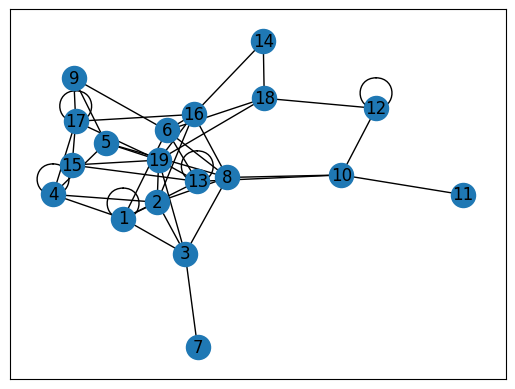

In [39]:
nx.draw_networkx(G)

In [40]:
c = nx.connected_components(G)

In [41]:
[x for x in nx.connected_components(G)]

[{np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(7),
  np.int64(8),
  np.int64(9),
  np.int64(10),
  np.int64(11),
  np.int64(12),
  np.int64(13),
  np.int64(14),
  np.int64(15),
  np.int64(16),
  np.int64(17),
  np.int64(18),
  np.int64(19)}]

In [42]:
G.nodes

NodeView((np.int64(1), np.int64(2), np.int64(4), np.int64(3), np.int64(5), np.int64(10), np.int64(8), np.int64(16), np.int64(14), np.int64(19), np.int64(18), np.int64(6), np.int64(13), np.int64(15), np.int64(17), np.int64(12), np.int64(9), np.int64(11), np.int64(7)))

In [ ]:
def main(file_address):
    file_folder = Path(file_address).parent
    df = pd.read_csv(file_address)
    train, test, _ = split_dataset(df,
                              similarity_threshold=0.4, 
                              train_set=0.7, 
                              test_frac=0.2)
    train, test = split_dataset(train, 
                                similarity_threshold=0.4, 
                                train_frac=0.7, 
                                test_frac=0.2)
    print(f"Len of splitted data: train {len(train)}, test {len(test)}")
    print(f"Fraction of splitted data: \
          train {len(train)/ len(df)}, test {len(test)/ len(df)}")
    df.iloc[train].to_csv(file_folder/ "train.csv", index=False)
    df.iloc[test].to_csv(file_folder/ "test.csv", index=False)
    

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Splitting data into train, test and val using lohi splitter")
    parser.add_argument("--file_address", type=str)
    args = parser.parse_args()

    file = args.file_address
    main(file)

In [366]:
100% 5

0

In [369]:
train_df = pd.read_csv("../data/train.csv")
val_df = pd.read_csv("../data/val.csv")

In [382]:
test_df = pd.read_csv("../data/test.csv")

In [383]:
train_df.shape, val_df.shape, test_df.shape

((65751, 2), (112994, 2), (40428, 2))

In [371]:
a = train_df.SMILES.to_list()[:100]

In [372]:
a

['Fc1cccc(Cl)c1CSCC(=O)NCc2cccnc2',
 'Brc1ccc(cc1)C(=O)NCC(=O)NCc2cccnc2',
 'CC(=NNC(=O)Cc1c(F)cccc1Cl)c2cccnc2',
 'CC(C)NC(=O)CSCc1c(Cl)cccc1Cl',
 'CC(C)NC(=O)CSCc1c(F)cccc1Cl',
 'CC(CC(=O)NCc1cccnc1)c2ccccc2',
 'CCC(CC)C(=O)NCc1cccnc1',
 'CCCCCCC(CC(=O)NCc1cccnc1)CC(=O)NCc2cccnc2',
 'CCN(CC(=O)NCc1ccc(F)cc1)C(=O)Cc2c(F)cccc2Cl',
 'CCN1C(=O)C=C(SCC(=O)NCc2cccnc2)c3ccccc13',
 'CN(CC(=O)NCc1cccnc1)S(=O)(=O)c2cc(Cl)ccc2Cl',
 'CN(CC(=O)NCc1cccnc1)S(=O)(=O)c2ccc(F)cc2',
 'COC(=O)CNC(=O)Cc1c(F)cccc1Cl',
 'COCCNC(=O)CSCc1c(F)cccc1Cl',
 'COc1ccc(CNC(=O)CSCc2cccc(Cl)c2)cc1',
 'COc1ccc(OCC(=O)NCc2cccnc2)cc1',
 'COc1cccc(c1)C(=O)NCCSCc2c(F)cccc2Cl',
 'COc1ccccc1C(=O)NCCSCc2c(F)cccc2Cl',
 'CS(=O)(=O)N(CC(=O)NCc1cccnc1)Cc2ccc(Cl)cc2',
 'CSc1ncc(Cl)c(n1)C(=O)NCc2cccnc2',
 'Cc1c(cnn1c2ccc(F)cc2)C(=O)NCCSCc3c(F)cccc3Cl',
 'Cc1ccc(CNC(=O)CSCc2cccc(F)c2)cc1',
 'Cc1ccc(CNC(=O)CSCc2ccccc2F)cc1',
 'Cc1ccc(CSCC(=O)NCc2cccnc2)cc1',
 'Cc1ccc(OCC(=O)NCc2cccnc2)cc1',
 'Cc1ccc(cc1)c2oc(C)c(CSCC(=O)NCc3cccnc3)n2

In [374]:
a.index('Cc1ccc(OCC(=O)NCc2cccnc2)cc1')

24

In [398]:
c = b < 5

c

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False, False])

In [375]:
merged = []
train_smiles = train_df.SMILES.to_list()
val_smiles = val_df.SMILES.to_list()

for t in train_smiles:
    if t in val_smiles:
        merged.append(val_smiles.index(t))

In [376]:
len(merged)

65751

In [ ]:
merged

In [378]:
val_df = val_df.drop(merged)

In [391]:
len(train_df), len(test_df), len(val_df)

(65751, 40428, 112994)

<Axes: xlabel='ACTIVITY'>

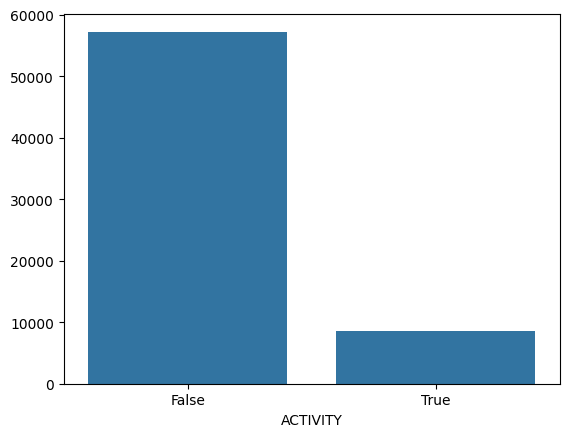

In [386]:
train_ct = train_df.ACTIVITY.value_counts()
sns.barplot(x=train_ct.index, y=train_ct.values)

<Axes: xlabel='ACTIVITY'>

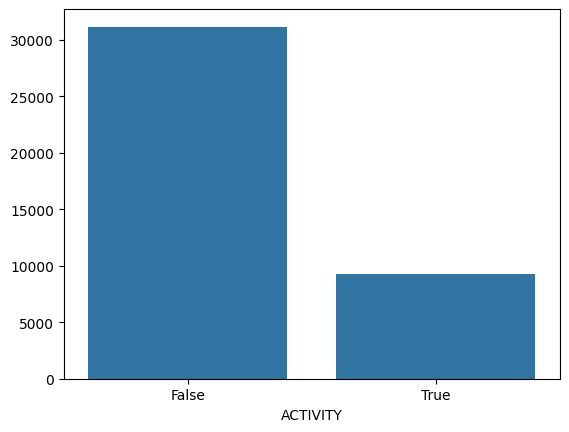

In [387]:
test_ct = test_df.ACTIVITY.value_counts()
sns.barplot(x=test_ct.index, y=test_ct.values)

<Axes: xlabel='ACTIVITY'>

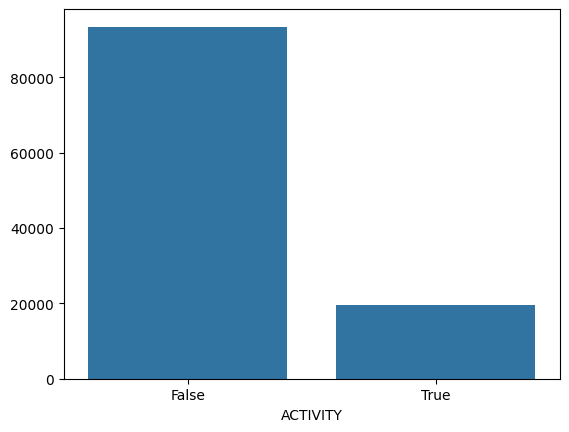

In [388]:
val_ct = val_df.ACTIVITY.value_counts()
sns.barplot(x=val_ct.index, y=val_ct.values)

In [380]:
val_df.to_csv("../data/val.csv", index=False)

In [423]:
b

[5,
 8,
 14,
 18,
 18,
 15,
 16,
 16,
 12,
 19,
 13,
 13,
 6,
 4,
 16,
 6,
 8,
 8,
 19,
 17,
 5,
 17,
 19,
 15,
 4,
 8,
 13,
 19,
 1,
 17,
 8,
 13,
 5,
 9,
 12,
 18,
 11,
 2,
 16,
 13,
 13,
 19,
 16,
 3,
 10,
 17,
 3,
 3,
 9,
 18]

In [394]:
fpgs = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)    

train_smiles = train_df["SMILES"].to_list() + val_df["SMILES"].to_list()
train_mols = [Chem.MolFromSmiles(x) for x in train_smiles]
train_fps = [fpgs.GetFingerprint(x) for x in train_mols]
print("All mols and fpgs gotten")

All mols and fpgs gotten


Compound in idex 51 failed
compound [150051]:  0.4166666666666667
Compound in idex 218 failed
compound [155147]:  0.5
compound [158364]:  0.5
compound [165238]:  0.625
compound [167206]:  0.40425531914893614
compound [167208]:  0.40425531914893614
compound [173685]:  0.4146341463414634
Compound in idex 475 failed
compound [141061]:  0.4166666666666667
compound [152887]:  0.6714285714285714
compound [156719]:  0.5662650602409639
compound [160787]:  0.5662650602409639
compound [176147]:  0.5529411764705883
Compound in idex 495 failed
compound [96797]:  0.4146341463414634
compound [116584]:  0.43333333333333335
compound [131104]:  0.4186046511627907
compound [155147]:  0.5526315789473685
compound [158364]:  0.6388888888888888
compound [165238]:  0.5428571428571428
compound [167206]:  0.4166666666666667
compound [167208]:  0.4166666666666667
compound [173426]:  0.41025641025641024
compound [173678]:  0.4090909090909091
compound [173679]:  0.5428571428571428
compound [173685]:  0.4285714285

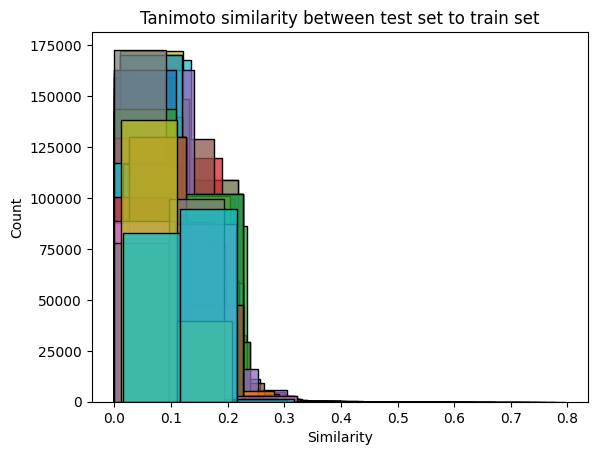

In [415]:
eval = np.random.choice(test, size=100)
for i in eval:
    smiles = test_df.loc[i, "SMILES"]
    mol = Chem.MolFromSmiles(smiles)
    fp = fpgs.GetFingerprint(mol)
    sim  = np.array(DataStructs.BulkTanimotoSimilarity(fp, train_fps))
    t = sim > 0.4
    t_ = sum(t)
    t = list(t)
    if t_ != 0:
        print(f"Compound in idex {i} failed")
        for i in range(t_):
            idx = t.index(True)
            print(f"compound {[idx+i]}: ", sim[idx+i])
            t.pop(idx)

    sns.histplot(sim, binwidth=0.1)
    plt.xlabel("Similarity")
    plt.title("Tanimoto similarity between test set to train set")
    plt.savefig("../visualizations/similarity_plot2.png")